In [8]:
import torchvision
import torch

celeba_ds = torchvision.datasets.CelebA(root='data/', split='train', target_type='attr', download=True)

Files already downloaded and verified


In [9]:
import matplotlib.pyplot as plt

In [10]:
# 获取所有属性，其中包括性别
attrs = celeba_ds.attr

# 通常情况下，'Male' 是属性列表中的一个，其值为 1 表示男性，0 表示女性
# 这里需要确认属性名称和具体标注，这个示例假设第21个属性为性别
male_indices = torch.where(attrs[:, 20] == 1)[0]
female_indices = torch.where(attrs[:, 20] == 0)[0]

# 根据索引创建子数据集
male_dataset = torch.utils.data.Subset(celeba_ds, male_indices)
female_dataset = torch.utils.data.Subset(celeba_ds, female_indices)

In [14]:
male_indices.__len__()

68261

In [15]:
import torchvision.transforms.v2 as transforms
from pathlib import Path
out_path = Path("data/myceleba/orig")
from tqdm import tqdm
for i in tqdm(range(200, 2000)):
    data = male_dataset[i]
    # if data[1] == 3:
    train_transform = [transforms.CenterCrop(140), transforms.Resize(256)]  
    img = data[0]
    # print(transforms.Compose(train_transform)(img).shape)
    out = transforms.Compose(train_transform)(img)
    # save Image
    out.save(out_path / f"{i}.png")
    # plt.figure(figsize=(4,4))
    # plt.imshow(transforms.Compose(train_transform)(img))
    # plt.grid(False)
    # plt.axis('off')
    # plt.show()

  0%|          | 0/1800 [00:00<?, ?it/s]

100%|██████████| 1800/1800 [00:49<00:00, 36.62it/s]


torch.Size([3, 64, 64])


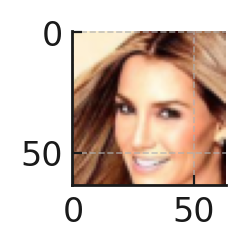

torch.Size([3, 64, 64])


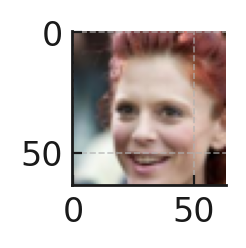

torch.Size([3, 64, 64])


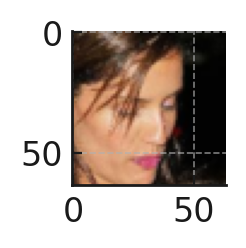

torch.Size([3, 64, 64])


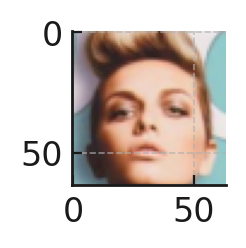

torch.Size([3, 64, 64])


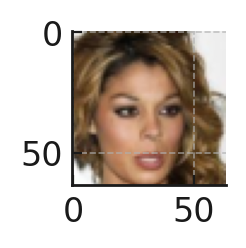

In [122]:
import torchvision.transforms as transforms
for i in range(5):
    data = female_dataset[i]
    # if data[1] == 3:
    train_transform = [transforms.CenterCrop(140), transforms.Resize(64), transforms.ToTensor()]  
    img = data[0]
    print(transforms.Compose(train_transform)(img).shape)
    plt.figure(figsize=(1,1))
    plt.imshow(transforms.Compose(train_transform)(img).permute(1, 2, 0))
    plt.show()

In [123]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
shoe = Image.open('/home/ljb/WassersteinSBP/data/ShoeV2/trainB/1031000079.png').convert('RGB')
sketch = Image.open('/home/ljb/WassersteinSBP/data/ShoeV2/trainA/1031000079_1.png').convert('RGB')

In [141]:
from pathlib import Path
# list(Path('/home/ljb/WassersteinSBP/data/ShoeV2/trainB/').glob('*.png'))
list(Path("/home/ljb/WassersteinSBP/data/ShoeV2/trainB").glob("*.png"))[0].stem

'2361550015'

In [156]:
sketch_path = Path("/home/ljb/WassersteinSBP/data/ShoeV2/trainA")
shoe_path = Path("/home/ljb/WassersteinSBP/data/ShoeV2/trainB")
file_names = []
sketch_names = [file.name for file in sketch_path.glob("*.png")]
for img_name in shoe_path.glob("*.png"):
    if f"{img_name.stem}_1.png" in sketch_names:
        file_names.append(img_name.name)

In [159]:
x = torch.randn(3, 64, 64)
torch.stack([x, x]).shape

torch.Size([2, 3, 64, 64])

In [157]:
file_names

['2361550015.png',
 '2453490249.png',
 '1876186345.png',
 '2441200482.png',
 '2198350011.png',
 '1796000078.png',
 '2385090008.png',
 '1962980000.png',
 '2395223037.png',
 '1957800078.png',
 '2404612391.png',
 '2457812739.png',
 '2391503329.png',
 '2074786403.png',
 '2285790008.png',
 '2449634140.png',
 '2431711599.png',
 '1815300078.png',
 '2457912741.png',
 '2465661509.png',
 '2320800078.png',
 '2424800000.png',
 '1970590911.png',
 '2365101678.png',
 '1772403736.png',
 '1868052017.png',
 '2142233646.png',
 '2285110508.png',
 '1820300078.png',
 '1699105043.png',
 '1980033885.png',
 '1327900078.png',
 '1927561901.png',
 '1961986366.png',
 '2369234017.png',
 '1616920042.png',
 '1298660034.png',
 '2267700079.png',
 '2459710508.png',
 '1791776294.png',
 '2475250800.png',
 '2392100000.png',
 '2423300079.png',
 '2285633939.png',
 '1613892509.png',
 '2297600078.png',
 '2401832318.png',
 '2415731533.png',
 '2472611770.png',
 '1942700078.png',
 '1806920043.png',
 '1475000618.png',
 '2058003746

In [164]:
train_transform = transforms.Compose([
    transforms.RandomAdjustSharpness(sharpness_factor=2),
    transforms.Resize(64), 
    transforms.ToTensor(), 
    transforms.Lambda(lambda x: (x-x.min())/(x.max()-x.min())), 
    # enhance contrast
    ])

[]

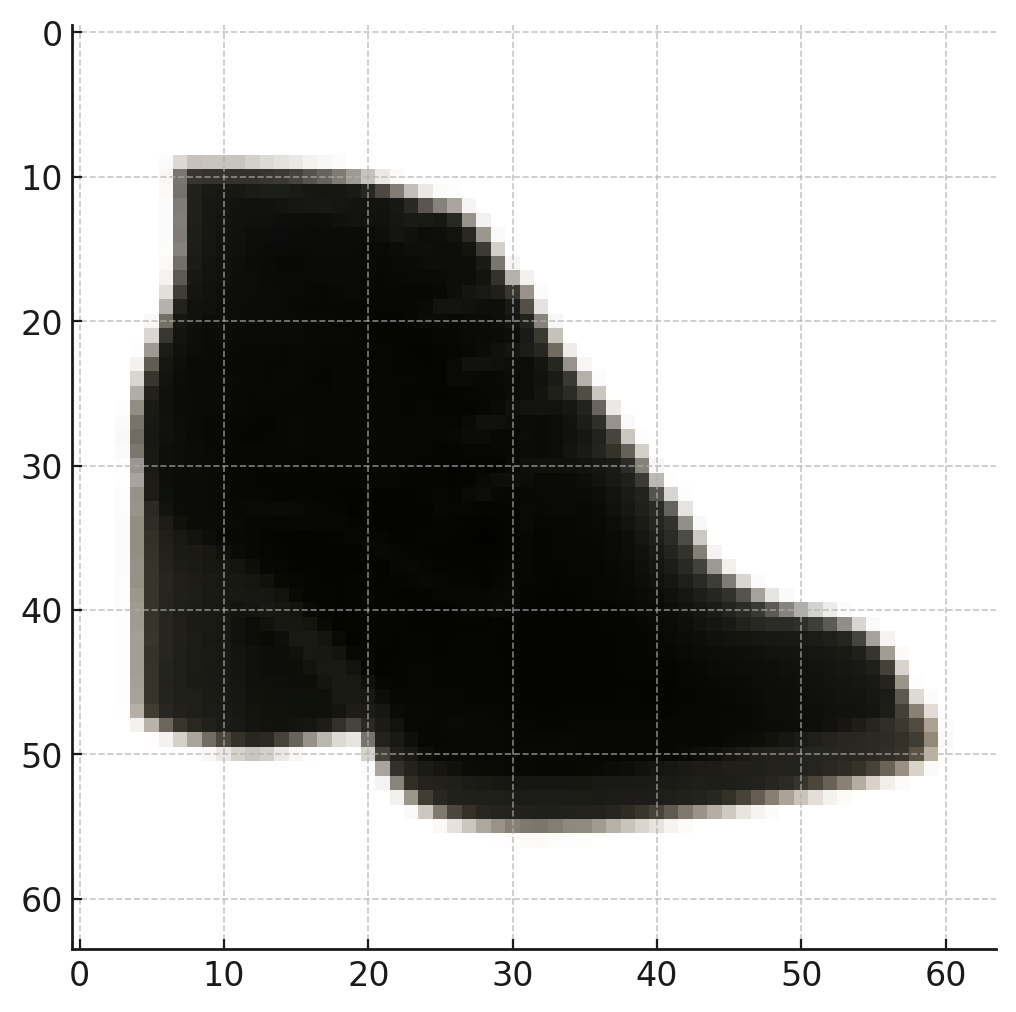

In [165]:
plt.imshow(train_transform(shoe).permute(1,2,0))
plt.plot()

In [166]:
np.array(sketch).min(), train_transform(sketch).min()

(0, tensor(0.))

[]

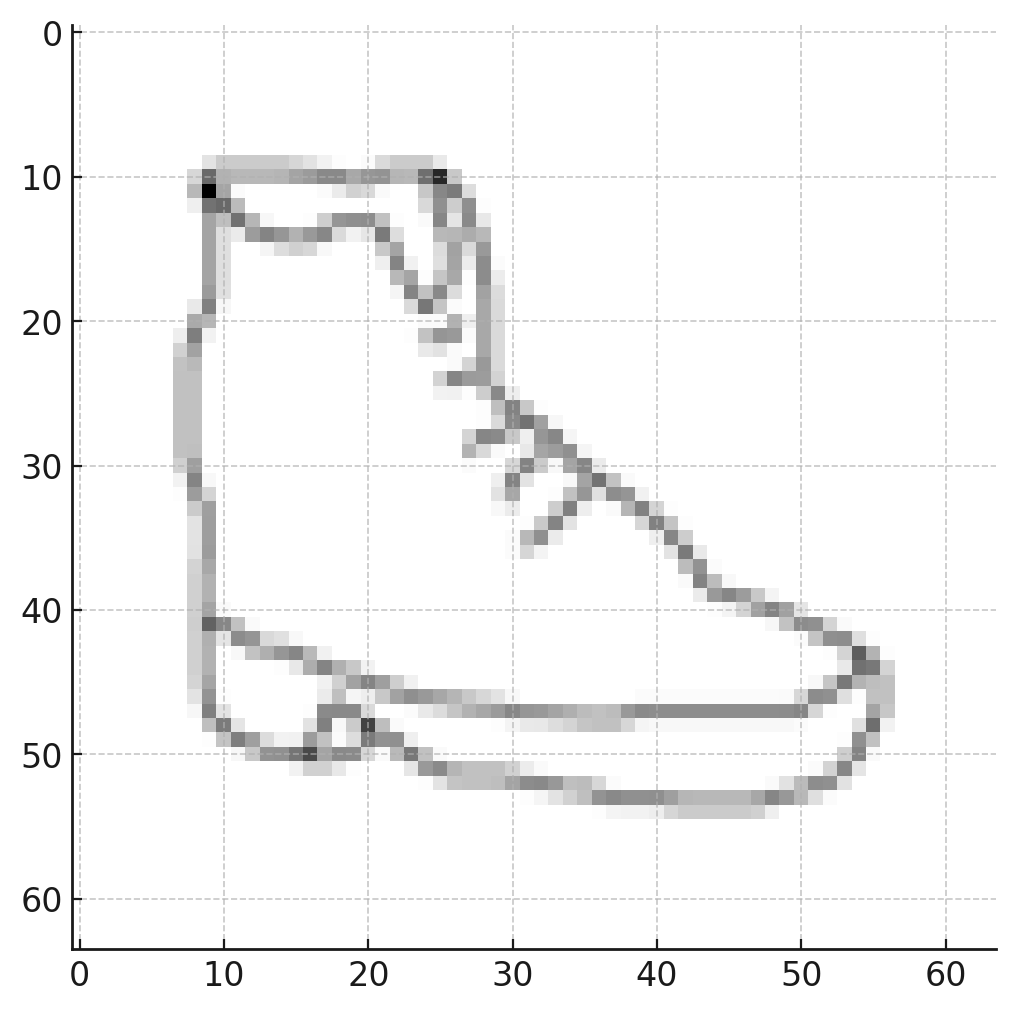

In [167]:
plt.imshow(train_transform(sketch).permute(1,2,0))
plt.plot()

In [72]:
import os
import torch
from torch.utils.data import Dataset
import numpy as np
import cv2
from tqdm import tqdm

class UCF101Dataset(Dataset):
    def __init__(self, data_dir, max_frame_len=32):
        self.data_dir = data_dir
        self.video_list = os.listdir(data_dir)
        self.data = []
        self.max_frame_len = max_frame_len
        self.load_data()

    def load_data(self):
        for video_name in tqdm(self.video_list):
            video_path = os.path.join(self.data_dir, video_name)
            frames = self.extract_frames(video_path)
            frames = [torch.from_numpy(frame) for frame in frames]
            frames = torch.stack(frames)
            self.data.append(frames)

    def extract_frames(self, video_path):
        frames = []
        cap = cv2.VideoCapture(video_path)
        count = 0
        while True:
            if self.max_frame_len is not None and count >= self.max_frame_len:
                break
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
            frames.append(frame)
            count += 1
            
        cap.release()
        return frames

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        frames = self.data[idx]
        # 这里可以根据需要进行进一步的数据处理，比如转换成Tensor等
        return frames

# 使用示例
data_dir = 'data/ucf101-videos/train'
dataset = UCF101Dataset(data_dir, max_frame_len=16)

100%|██████████| 594/594 [00:05<00:00, 114.56it/s]


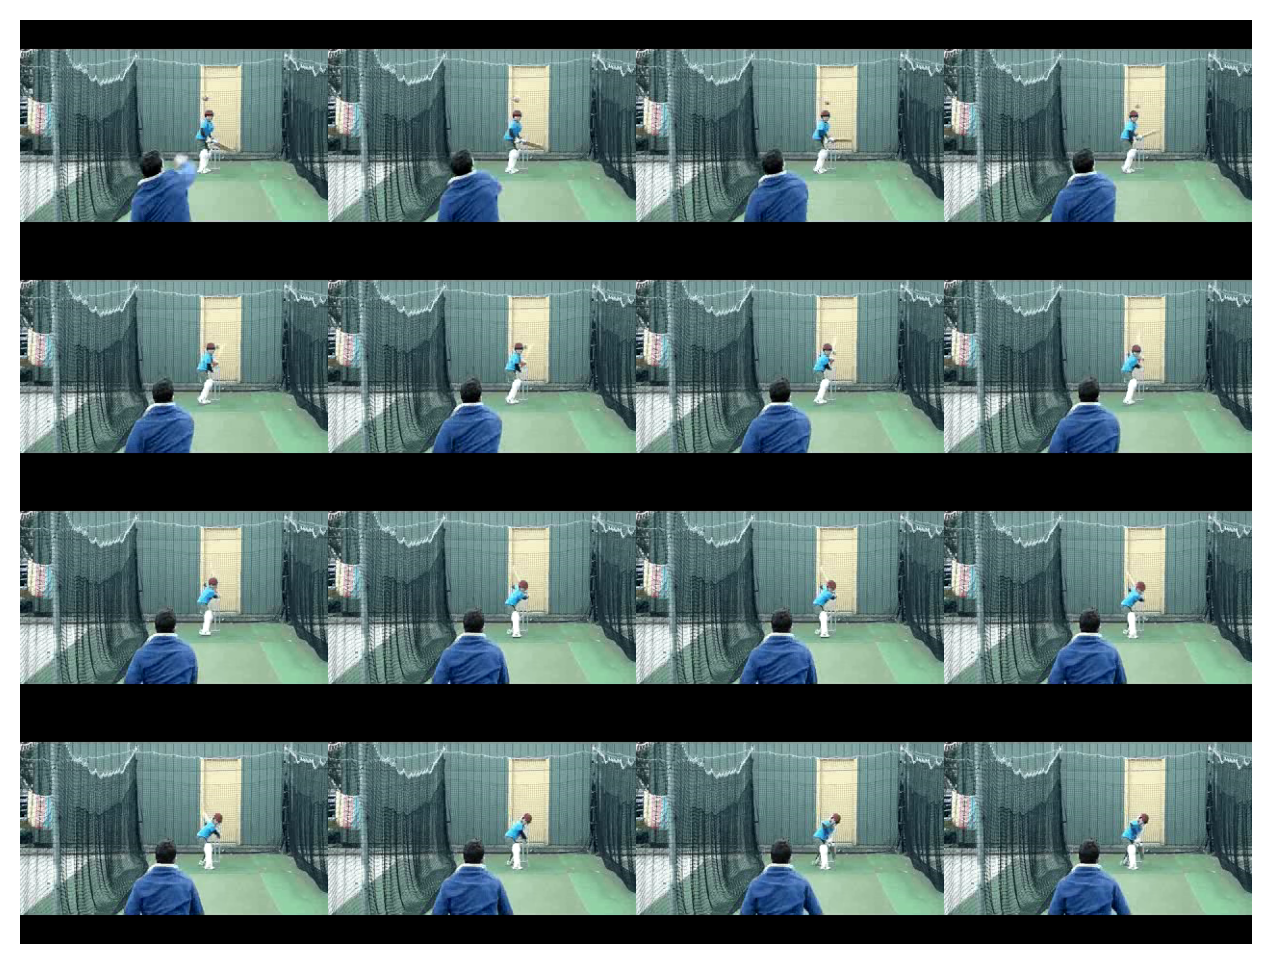

In [73]:
now = dataset[382]
combined_image = torch.cat([torch.cat([now[j] for j in range(k, k+4)], dim=1) for k in range(0, 16, 4)], dim=0)
combined_image.shape
plt.imshow(combined_image.numpy())
plt.grid(False)
plt.axis('off')
plt.show()

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3


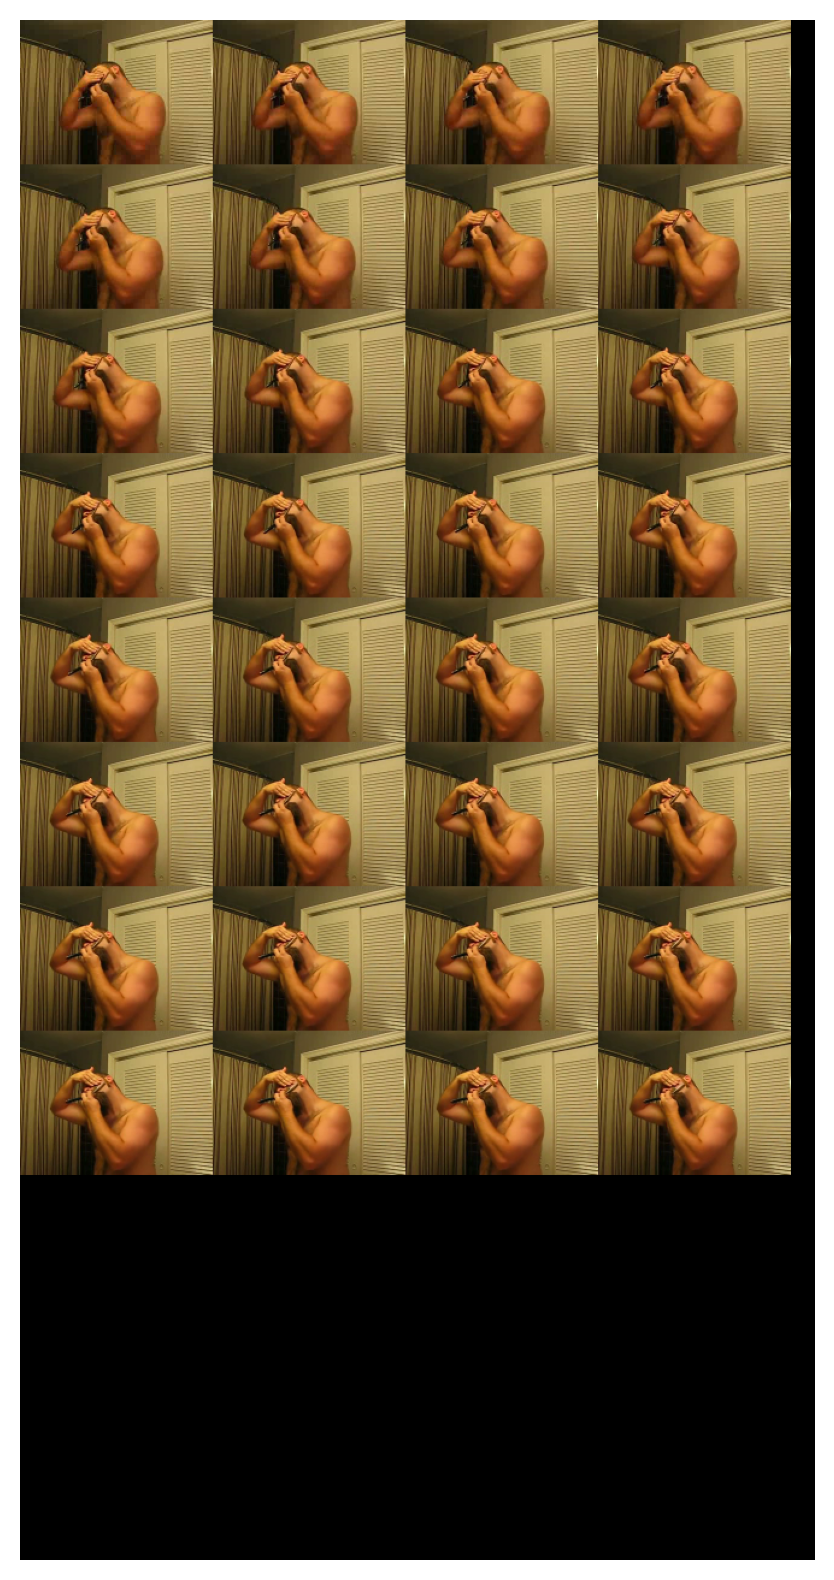

In [58]:
import cv2
import numpy as np

def concatenate_frames(frames):
    # Check if the number of frames is valid
    if len(frames) != 32:
        raise ValueError("The number of frames should be 32 (8x4 grid).")

    # Create an empty canvas for the concatenated image
    canvas = np.zeros((80*8*2, 60*11, 3), dtype=np.uint8)

    # Iterate over the frames and place them in the canvas
    for i, frame in enumerate(frames):
        # Resize the frame to fit the grid cell
        resized_frame = cv2.resize(frame, (80*2, 60*2))

        # Calculate the row and column indices for the current frame
        row = i // 4
        col: int = i % 4
        print(row, col)
        # Calculate the coordinates for placing the frame in the canvas
        x = col * 80*2
        y = row * 60*2

        # Place the frame in the canvas
        canvas[y:y+60*2, x:x+80*2] = resized_frame

    return canvas

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(concatenate_frames(dataset[2].numpy()))
plt.axis('off')
plt.show()

In [11]:
# 导出第一个视频
video = dataset[0]
print(video.shape)
# 保存为test.avi
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('test.avi', fourcc, 30, (video.shape[2], video.shape[1]))
for frame in video:
    frame = cv2.cvtColor(frame.numpy(), cv2.COLOR_RGB2BGR)
    out.write(frame)
out.release()


torch.Size([32, 240, 320, 3])


In [3]:
from PIL import Image
from pathlib import Path
all_img_path = Path("/home/ljb/WassersteinSBP/data/imagenet-mini/train/n03947888")
img = Image.open(list(all_img_path.glob("*.JPEG"))[0])

(375, 500, 3)


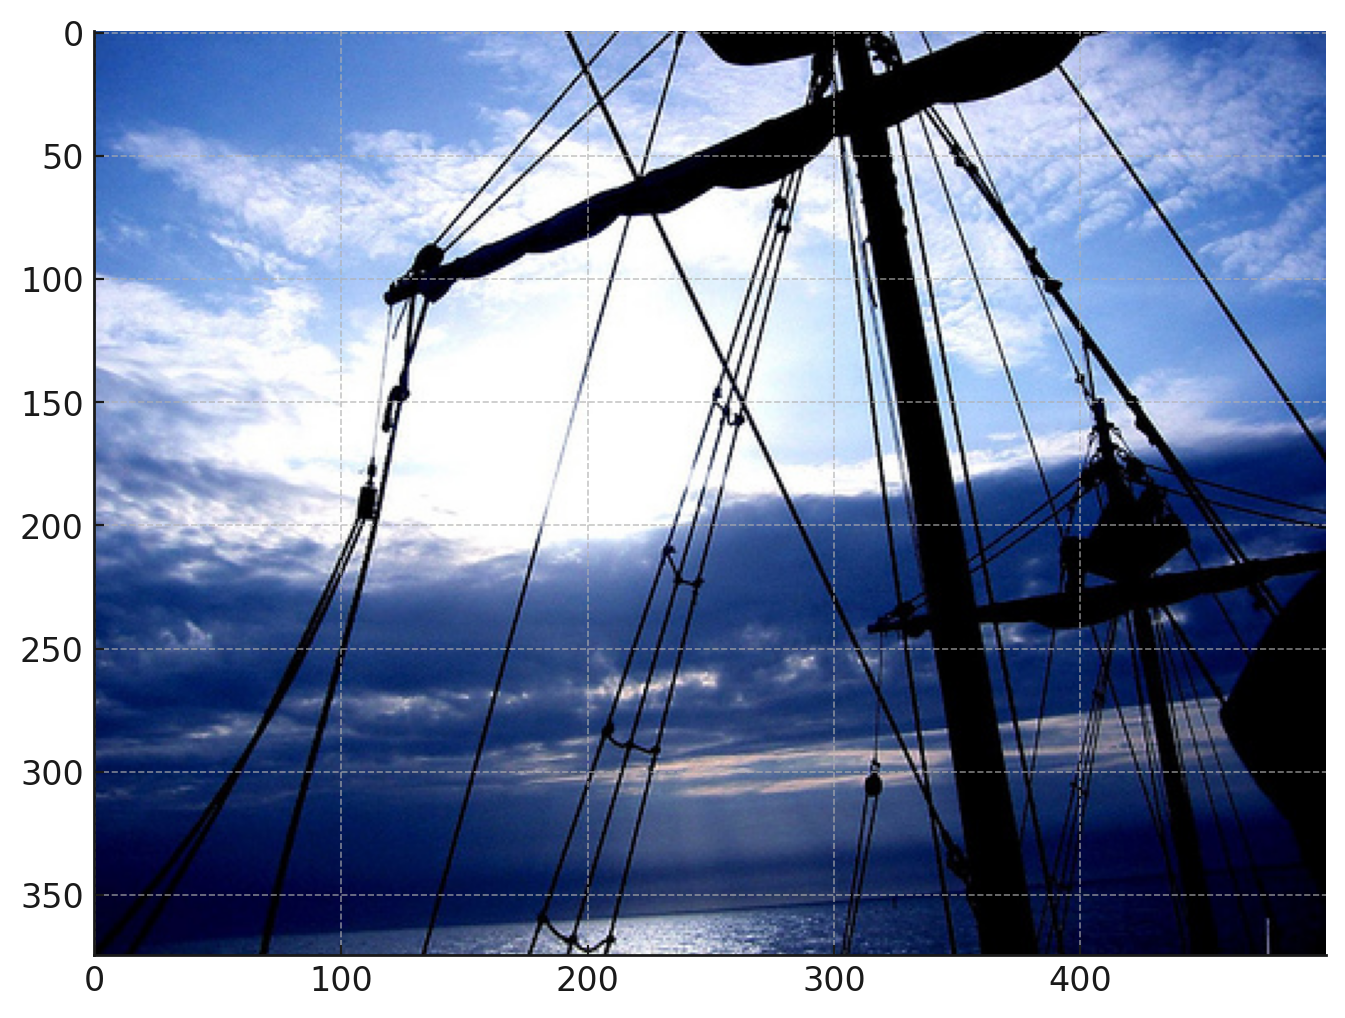

In [5]:
import matplotlib.pyplot as plt
import numpy as np
print(np.array(img).shape)
plt.imshow(img)

plt.show()